<class 'tuple'>
[80.0, 90.0, 100.0, 110.0, 115.0, 90.0, 55.0, 0.0]
[80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 112.5, 115.0, 102.5, 90.0, 72.5, 55.0, 0.0]
24
[35.0, 45.0, 50.0, 55.0, 75.0, 95.0, 125.0, 115.0, 125.0, 130.0, 140.0, 135.0, 130.0, 125.0, 125.0, 140.0, 135.0, 120.0, 115.0, 95.0, 80.0, 80.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 112.5, 115.0, 102.5, 90.0, 72.5, 55.0]
36
['2022-08-28 06:00', '2022-08-28 12:00', '2022-08-28 18:00', '2022-08-29 00:00', '2022-08-29 06:00', '2022-08-29 12:00', '2022-08-29 18:00', '2022-08-30 00:00', '2022-08-30 06:00', '2022-08-30 12:00', '2022-08-30 18:00', '2022-08-31 00:00', '2022-08-31 06:00', '2022-08-31 12:00', '2022-08-31 18:00', '2022-09-01 00:00', '2022-09-01 06:00', '2022-09-01 12:00', '2022-09-01 18:00', '2022-09-02 00:00', '2022-09-02 06:00', '2022-09-02 12:00', '2022-09-02 18:00', '2022-09-03 00:00']
['Jan', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
['', '', '', '29AUG\n00Z', '', '', 

C:\Users\a247\AppData\Local\Temp\ipykernel_124828\546331126.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ob" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x,rmaxwind,'-ob',color='b')


[35.0, 45.0, 50.0, 55.0, 75.0, 95.0, 125.0, 115.0, 125.0, 130.0, 140.0, 135.0, 130.0, 125.0, 125.0, 140.0, 135.0, 120.0, 115.0, 95.0, 80.0, 80.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 112.5, 115.0, 102.5, 90.0, 72.5, 55.0]


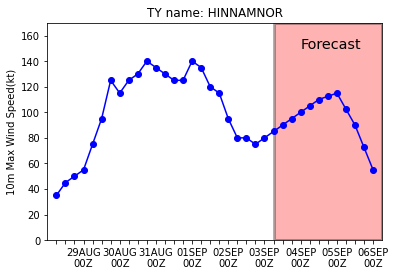

In [1]:
def PLTYIntensity(rmaxwind,TYname,xdate):
    print(type(rmaxwind))
    #for i in rmaxwind:
        #print(i)
    lenx=len(rmaxwind)
    x= np.arange(lenx)
    fig=plt.figure()
    # print(x,rmaxwind[:])
    ax=plt.axes()
    ax.set_title("TY name: "+TYname)
    type(tydate)
    ax.set_xticks(x,xdate)
    ax.set_xlim(-1,lenx)
    ax.set_ylim(0,170)
    ax.set_ylabel("10m Max Wind Speed(kt)")
    # Add text
    plt.text(27, 150, "Forecast",fontsize='x-large')
    ax.plot(x,rmaxwind,'-ob',color='b')

    # Add rectangle
    ax.add_patch(patches.Rectangle((24, 0), 12, 170, alpha=0.3, facecolor="red", edgecolor="black", linewidth=3, linestyle='solid'))
    fig.savefig("ty_intensity.png")



def ReadLatLonIntensityTYfromRAMMB(file):
    # open/read file content
    with open(file)as fr: 
         # Skip first line : lines[0:]
         lines=fr.readlines()[1:]
    # split out variables
    rlon=[]
    rlat=[]
    rmaxwind=[]
    tydate=[]
    for line in reversed(lines):
        s = line.split('\t')
        rlat.append(float(s[1]))
        rlon.append(float(s[2]))
        rmaxwind.append(float(s[3]))
        tydate.append(s[0])
    return rlat,rlon,rmaxwind,tydate

# Main program

TYdata = ReadLatLonIntensityTYfromRAMMB("ty_2022no011.txt")
print(type(TYdata))
rlon,rlat,rmaxwind,tydate=TYdata

rmaxwind_obs = rmaxwind
# Read fcst data
    
with open("f.txt")as fr: 
         # Skip first line : lines[0:]
         lines_f=fr.readlines()[1:]
rlon_f=[]
rlat_f=[]
rmaxwind_f=[]
for line in lines_f:
    s = line.split('\t')
    rlat_f.append(float(s[1]))
    rlon_f.append(float(s[2]))
    rmaxwind_f.append(float(s[3]))
rmaxwind_fcst=rmaxwind_f
aaa=tuple(rmaxwind_f)
print(rmaxwind_fcst)
for i in [1,3,5,7,9,11]:
    k=int((i+1)/2)
    rmaxwind_fcst.insert(i,(aaa[k-1]+aaa[k])/2)
print(rmaxwind_fcst)
print(len(rmaxwind))

for i in range(1,13):
    rmaxwind.append(rmaxwind_fcst[i])

print(rmaxwind)
print(len(rmaxwind))

# PLOT figure

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
MONTH=["Jan","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
print(tydate)
print(MONTH)
xdate=[]
for s in tydate:
    imon=int(s[5:7])
    amon=MONTH[imon-1]
    if s[11:13] == "00":
         stmp = s[8:10]+amon+"\n"+s[11:13]+"Z"
    else:
         stmp =""
    xdate.append(stmp)
print(xdate)
print(len(xdate))

for i in range(1,4):
    xdate.append("")
xdate.append("04SEP\n00Z")
for i in range(1,4):
    xdate.append("")
xdate.append("05SEP\n00Z")
for i in range(1,4):
    xdate.append("")
xdate.append("06SEP\n00Z")
print(xdate)
print(len(xdate))
PLTYIntensity(rmaxwind,"HINNAMNOR",xdate)
#PLTYIntensity2(rmaxwind,"HINNAMNOR",xdate)
print(rmaxwind_obs)